In [10]:
# Instalación de librerías necesarias
!pip install matplotlib seaborn pandas scikit-learn --quiet

In [11]:
# Importaciones
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
# Cargar resultados generados en la etapa de pruebas
df = pd.read_csv("/content/drive/MyDrive/Proyectos/ChatBot/resultados_completos_chatbot.csv")

In [13]:
# Limpieza
df["Resultado_automático"] = df["Resultado_automático"].str.strip()
df["Similitud"] = pd.to_numeric(df["Similitud"], errors="coerce")

In [14]:
# Agrupar por tipo y calcular precisión
precision_por_tipo = df.groupby("Tipo")["Resultado_automático"].apply(lambda x: (x == "✔️").mean()).reset_index()
precision_por_tipo.columns = ["Tipo", "Precisión"]

/tmp/ipython-input-15-1463211706.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=precision_por_tipo, x="Precisión", y="Tipo", palette="crest")


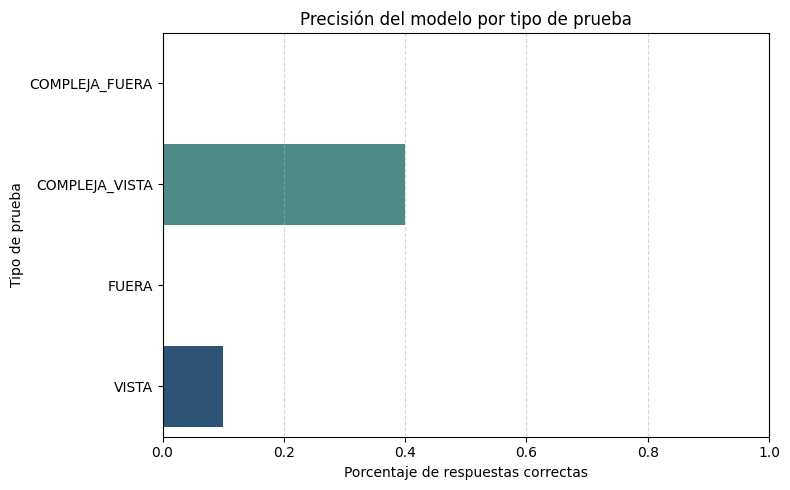

In [15]:
# Gráfico de barras
plt.figure(figsize=(8,5))
sns.barplot(data=precision_por_tipo, x="Precisión", y="Tipo", palette="crest")
plt.title("Precisión del modelo por tipo de prueba")
plt.xlim(0,1)
plt.xlabel("Porcentaje de respuestas correctas")
plt.ylabel("Tipo de prueba")
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

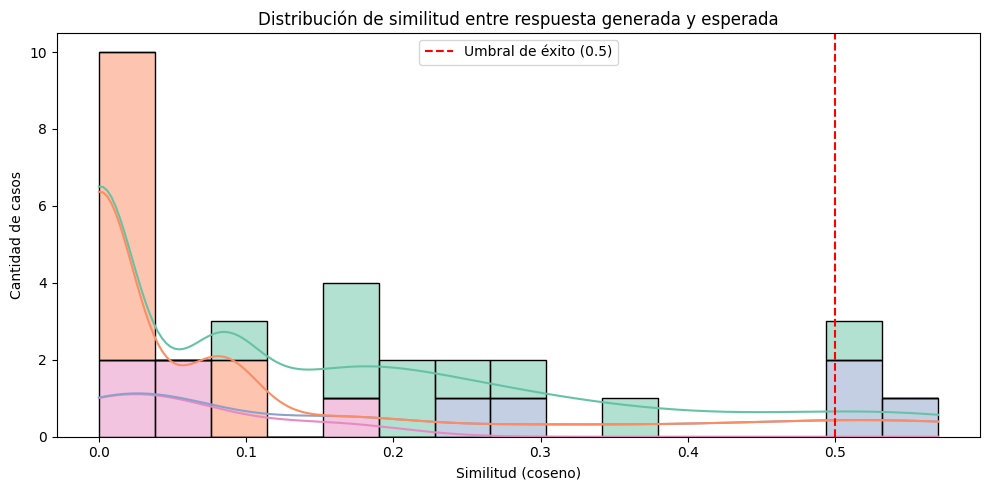

In [16]:
# Distribucion de similitudes

plt.figure(figsize=(10,5))
sns.histplot(data=df, x="Similitud", hue="Tipo", kde=True, bins=15, palette="Set2", multiple="stack")
plt.title("Distribución de similitud entre respuesta generada y esperada")
plt.xlabel("Similitud (coseno)")
plt.ylabel("Cantidad de casos")
plt.axvline(0.5, color="red", linestyle="--", label="Umbral de éxito (0.5)")
plt.legend()
plt.tight_layout()
plt.show()

/tmp/ipython-input-17-1966070620.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo.index, y=conteo.values, palette=["green", "red"])
/tmp/ipython-input-17-1966070620.py:10: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


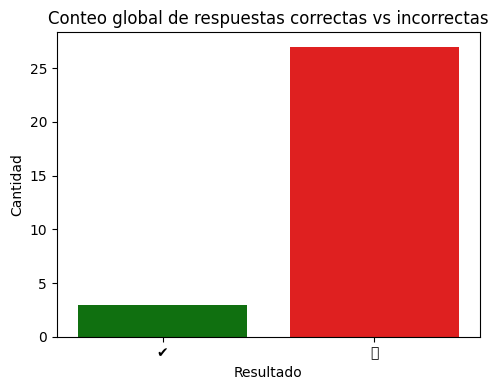

In [17]:
# Matriz de confusión simple (✔️ vs ❌)

conteo = df["Resultado_automático"].value_counts().reindex(["✔️", "❌"], fill_value=0)

plt.figure(figsize=(5,4))
sns.barplot(x=conteo.index, y=conteo.values, palette=["green", "red"])
plt.title("Conteo global de respuestas correctas vs incorrectas")
plt.ylabel("Cantidad")
plt.xlabel("Resultado")
plt.tight_layout()
plt.show()

In [18]:
# Ejemplos incorrectos con baja similitud (análisis cualitativo)

errores = df[df["Resultado_automático"] == "❌"].sort_values("Similitud").head(5)
errores[["Pregunta", "Salida_esperada", "Respuesta_generada", "Similitud"]]

,Pregunta,Salida_esperada,Respuesta_generada,Similitud
13,¿Qué es una función exponencial?,Pregunta fuera del dominio,Una función exponencial es una función que tom...,0.0
16,¿Qué libros escribió Borges?,Pregunta fuera del dominio,"Borges escribió varios libros, incluyendo la n...",0.0
14,¿Cómo cocinar arroz?,Pregunta fuera del dominio,1. Preheat oven to 375°F. 2. Rinse the rice in...,0.0
15,¿Qué pasó en la batalla de San Lorenzo?,Pregunta fuera del dominio,"En la batalla de San Lorenzo, los españoles de...",0.0
11,¿Cómo se hace un bizcochuelo?,Pregunta fuera del dominio,"Para hacer un bizcochuelo, se necesita un mold...",0.0
